Analyze the effect of high dose naspm on spontaneous synaptic transmission

In [1]:
import numpy as np
import pandas as pd
import scipy.io as sio
import matplotlib.pyplot as plt
from scipy.optimize import curve_fit
from scipy import stats as sc
import pdb
from Patch_ana import patch_pip, spon_ana
import seaborn as sns
import pickle
from matplotlib.backends.backend_pdf import PdfPages
plt.style.use('classic')
import seaborn as sns

% matplotlib inline
# % matplotlib notebook

%load_ext autoreload
% autoreload 2

In [2]:
cd /data

/data


In [3]:
data_ana = pd.read_pickle('/data/ana_asso_2Hz_reci')
data_ana

,Before,After,File name,spon_elimi_bef,spon_elimi_aft,elimi
139,"{'raw_onset_tau': [nan, nan, 0.0006, 0.0008, n...","{'raw_onset_tau': [nan, nan, nan, nan, nan, na...",2017111401,"[4, 19, 20, 26, 37]","[83, 99, 104]",50
140,"{'raw_onset_tau': [0.00068, 0.00096, 0.00056, ...","{'raw_onset_tau': [0.001, 0.00048, 0.00064, 0....",2017111402,[],[24],25
141,"{'raw_onset_tau': [0.00044, nan, 0.0006, nan, ...","{'raw_onset_tau': [0.00052, 0.0004, 0.00032, 0...",2017111501,"[2, 13, 17, 19, 27, 32, 39, 41, 44, 50, 51]","[5, 6, 17, 22]",16
142,"{'raw_onset_tau': [nan, nan, nan, nan, nan, 0....","{'raw_onset_tau': [0.00124, 0.00084, nan, 0.00...",2017111601,"[4, 11, 14, 17, 22, 28, 29, 35, 37, 44]","[7, 9, 15, 23, 32, 35]",20
143,"{'raw_onset_tau': [nan, nan, 0.00064, 0.00184,...","{'raw_onset_tau': [0.00068, 0.0008, 0.0006, 0....",2017111601,"[2, 9, 23, 35]","[42, 51, 57]",30
144,"{'raw_onset_tau': [nan, nan, nan, nan, nan, na...","{'raw_onset_tau': [nan, nan, 0.00176, 0.00044,...",2017111602,"[0, 2, 4, 13, 15, 16, 41]","[21, 36, 41, 51, 54, 55]",25
145,"{'raw_onset_tau': [0.00096, 0.00156, 0.00064, ...","{'raw_onset_tau': [0.0006, 0.00088, 0.00124, 0...",2017111001,"[7, 32, 43]",[71],50
146,"{'raw_onset_tau': [0.00044, 0.00068, 0.0004, 0...","{'raw_onset_tau': [0.00052, 0.0006, 0.00096, 0...",2017111002,[],[],30


In [4]:
amp_bef = []
amp_aft = []
onset_tau_bef = []
onset_tau_aft = []
decay_tau_bef = []
decay_tau_aft = []
freq_bef_fast = []
freq_aft_fast = []
freq_bef_slow = []
freq_aft_slow = []
data_index = list(data_ana.index)
for i in range(len(data_ana)):
    target = data_index[i]
    psc_naspm_bef = pd.read_pickle('/data/psc_asso_2Hz_reci_slope2_thres2.5_before_'+str(target))
    psc_naspm_aft = pd.read_pickle('/data/psc_asso_2Hz_reci_slope2_thres2.5_after_'+str(target))
    para_bef, para_aft = spon_ana.pair_amp_tau(psc_naspm_bef, psc_naspm_aft)
    amp_bef.append(para_bef['amp'][-500:])
    amp_aft.append(para_aft['amp'][-500:])
    onset_tau_bef.append(para_bef['onset_tau'][-500:])
    onset_tau_aft.append(para_aft['onset_tau'][-500:])
    decay_tau_bef.append(para_bef['decay_tau'][-500:])
    decay_tau_aft.append(para_aft['decay_tau'][-500:])
    #freq_bef.append(len(para_bef['decay_tau'][para_bef['decay_tau']<0.0005]))
    #freq_aft.append(len(para_aft['decay_tau'][para_aft['decay_tau']<0.0005]))
    para_bef['decay_tau'] = para_bef['decay_tau'][-500:]
    para_aft['decay_tau'] = para_aft['decay_tau'][-500:]
    freq_bef_fast.append(len(para_bef['decay_tau'][para_bef['decay_tau']<0.0005]))
    freq_aft_fast.append(len(para_aft['decay_tau'][para_aft['decay_tau']<0.0005]))
    freq_bef_slow.append(len(para_bef['decay_tau'][para_bef['decay_tau']>0.0005]))
    freq_aft_slow.append(len(para_aft['decay_tau'][para_aft['decay_tau']>0.0005]))
amp_bef = np.hstack(amp_bef)
amp_aft = np.hstack(amp_aft)
onset_tau_bef = np.hstack(onset_tau_bef)
onset_tau_aft = np.hstack(onset_tau_aft)
decay_tau_bef = np.hstack(decay_tau_bef)
decay_tau_aft = np.hstack(decay_tau_aft)

FileNotFoundError: [Errno 2] No such file or directory: '/data/psc_asso_2Hz_reci_slope2_thres2.5_after_144'

In [ ]:
freq_bef_mean = np.mean(freq_bef_fast)
freq_bef_ste = np.std(freq_bef_fast)/np.sqrt(len(freq_bef_fast))
freq_aft_mean = np.mean(freq_aft_fast)
freq_aft_ste = np.std(freq_aft_fast)/np.sqrt(len(freq_aft_fast))

for i, j in zip(freq_bef_fast, freq_aft_fast):
    plt.plot([0.5,1.5], [i,j], 'bo-', alpha=0.3, markersize=10)
plt.errorbar([0.5,1.5], [freq_bef_mean, freq_aft_mean], [freq_bef_ste, freq_aft_ste], fmt='r-o', markersize=10)
plt.xlim([0,2])
plt.ylim([-1,16])

with PdfPages('/data/mini_freq_post_2_fast.pdf') as pdf:
    pdf.savefig()

In [ ]:
freq_bef_mean = np.mean(freq_bef_slow)
freq_bef_ste = np.std(freq_bef_slow)/np.sqrt(len(freq_bef_slow))
freq_aft_mean = np.mean(freq_aft_slow)
freq_aft_ste = np.std(freq_aft_slow)/np.sqrt(len(freq_aft_slow))

for i, j in zip(freq_bef_slow, freq_aft_slow):
    plt.plot([0.5,1.5], [i,j], 'bo-', alpha=0.3, markersize=10)
plt.errorbar([0.5,1.5], [freq_bef_mean, freq_aft_mean], [freq_bef_ste, freq_aft_ste], fmt='r-o', markersize=10)
plt.xlim([0,2])
plt.ylim([0,600])

with PdfPages('/data/mini_freq_post_2_slow.pdf') as pdf:
    pdf.savefig()

In [ ]:
freq_bef

In [ ]:
freq_aft

In [ ]:
sc.ttest_rel(freq_bef, freq_aft)

In [ ]:
plt.hist(amp_bef, bins=100, alpha=0.5)
plt.hist(amp_aft, bins=100, alpha=0.5)
plt.xlim([0, 4e-10])

In [ ]:
bin_edge_bef, cdf_amp_bef = spon_ana.cdf_gen(amp_bef)
bin_edge_aft, cdf_amp_aft = spon_ana.cdf_gen(amp_aft)
plt.plot(bin_edge_bef, cdf_amp_bef)
plt.plot(bin_edge_aft, cdf_amp_aft)
#plt.xlim([0,1e-10])
print(sc.ranksums(amp_bef, amp_aft))

with PdfPages('/data/anti_hebbian_mini_amp.pdf') as pdf:
    pdf.savefig()

In [ ]:
bin_edge_bef, cdf_amp_bef = spon_ana.cdf_gen(onset_tau_bef)
bin_edge_aft, cdf_amp_aft = spon_ana.cdf_gen(onset_tau_aft)
plt.plot(bin_edge_bef, cdf_amp_bef)
plt.plot(bin_edge_aft, cdf_amp_aft)
sc.ranksums(onset_tau_bef, onset_tau_aft)

with PdfPages('/data/anti_hebbian_mini_onset_tau.pdf') as pdf:
    pdf.savefig()

In [ ]:
plt.hist(onset_tau_bef, alpha=0.5, bins=20)
plt.hist(onset_tau_aft, alpha=0.5, bins=20)

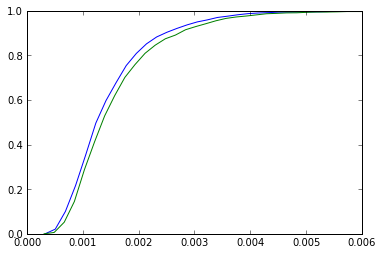

In [142]:
bin_edge_bef, cdf_amp_bef = spon_ana.cdf_gen(decay_tau_bef)
bin_edge_aft, cdf_amp_aft = spon_ana.cdf_gen(decay_tau_aft)
plt.plot(bin_edge_bef, cdf_amp_bef)
plt.plot(bin_edge_aft, cdf_amp_aft)
plt.xlim([0,0.006])

with PdfPages('/data/post_2Hz_mini_decay_tau.pdf') as pdf:
    pdf.savefig()

In [143]:
sc.ttest_ind(decay_tau_bef, decay_tau_aft)

Ttest_indResult(statistic=-4.7718352383851306, pvalue=1.8803532829753747e-06)

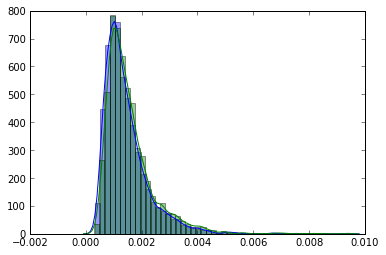

In [48]:
sns.distplot(decay_tau_bef, bins=50)
sns.distplot(decay_tau_aft, bins=50)

In [57]:
log_amp_bef = np.log(para_bef['amp'])
log_amp_aft = np.log(para_aft['amp'])
log_decay_bef = np.log(para_bef['decay_tau'])
log_decay_aft = np.log(para_aft['decay_tau'])

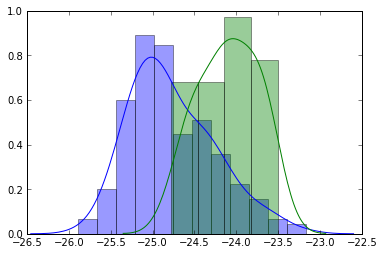

In [43]:
sns.distplot(log_amp_bef)
sns.distplot(np.log(decay_tau_stim_bef))

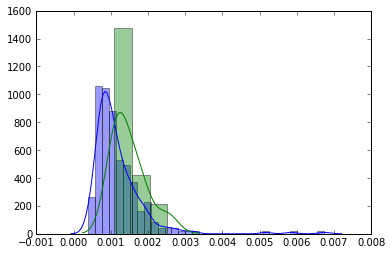

In [11]:
sns.distplot(para_bef['decay_tau'])
sns.distplot(decay_tau_stim_bef)

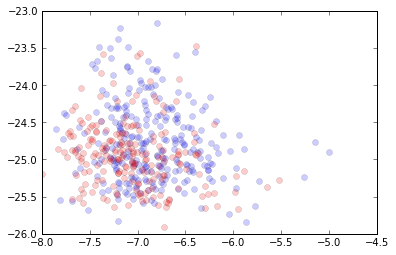

In [12]:
plt.plot(log_decay_bef,log_amp_bef , 'o', alpha=0.2)
plt.plot(log_decay_aft,log_amp_aft , 'ro', alpha=0.2)
# plt.xlim([-8.5, -4.5])
# plt.ylim([-26.5, -23])

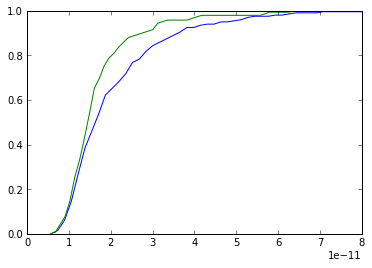

In [48]:
bin_edge_bef, cdf_amp_bef = spon_ana.cdf_gen(para_bef['amp'])
bin_edge_aft, cdf_amp_aft = spon_ana.cdf_gen(para_aft['amp'])
plt.plot(bin_edge_bef, cdf_amp_bef)
plt.plot(bin_edge_aft, cdf_amp_aft)

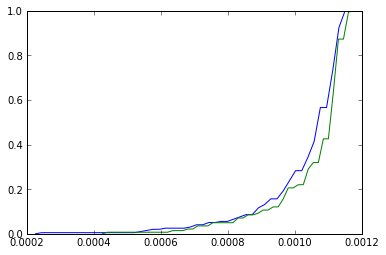

In [49]:
bin_edge_bef, cdf_amp_bef = spon_ana.cdf_gen(para_bef['onset_tau'])
bin_edge_aft, cdf_amp_aft = spon_ana.cdf_gen(para_aft['onset_tau'])
plt.plot(bin_edge_bef, cdf_amp_bef)
plt.plot(bin_edge_aft, cdf_amp_aft)